In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data= pd.read_csv("houseprice.csv")

In [3]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0


In [4]:
data.shape

(21613, 13)

In [5]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [6]:
data.corr()['price'].sort_values(ascending= False)

price            1.000000
sqft_living      0.702044
sqft_above       0.605566
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
yr_built         0.053982
condition        0.036392
Name: price, dtype: float64

In [8]:
# Apply Log Transformation to skewed features
import numpy as np 
log_features = ['sqft_living', 'sqft_above', 'sqft_basement', 'price']
for feature in log_features:
    data[feature] = np.log1p(data[feature])

In [9]:
# Drop low-correlation features
low_corr_features = ['condition', 'yr_built', 'sqft_lot']
data.drop(columns=low_corr_features, inplace=True)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Use MinMaxScaler() if needed
scaled_features = ['sqft_living', 'sqft_above', 'sqft_basement', 'bathrooms', 'bedrooms', 'floors', 'waterfront', 'view']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

In [12]:
x= data.iloc[:, 1:]
y= data["price"]

In [13]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'yr_renovated'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

In [16]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [21]:
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [22]:
dt.score(x_test, y_test)*100

47.91519738256659

In [23]:
dt.score(x_train, y_train)*100

47.44649048422244

In [28]:
for i in range(1, 20):
    dt1= DecisionTreeRegressor(max_depth= i)
    dt1.fit(x_train, y_train)
    print(dt1.score(x_train, y_train)*100, dt1.score(x_test, y_test)*100, i)

31.54561608713451 31.427239445902444 1
43.370086960774934 43.27625011913747 2
47.44649048422244 47.915197382566554 3
50.33953717163361 50.681979005544164 4
52.281471034347724 51.94417208014506 5
53.726209209621054 52.56752217736593 6
55.06358266766451 52.619143624179706 7
56.944741980764576 52.64737863832488 8
58.7671780969685 51.35920462573761 9
60.8603992793175 50.19153064410824 10
63.12127255405817 48.67572386888326 11
65.4285828163849 46.83174826300901 12
68.03737316113951 44.73342253137504 13
70.59868616137805 42.2782848303193 14
73.0375722213719 40.99399929324829 15
75.6303256254091 38.59857352822884 16
77.88203652631712 37.45135339279927 17
80.12017594010257 34.11612464733766 18
81.9978233732309 31.684154518506702 19


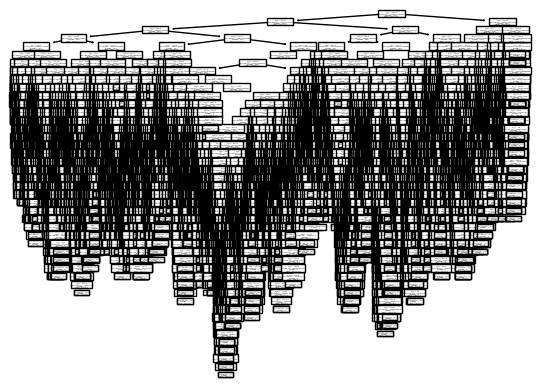

In [38]:
plot_tree(dt)
plt.savefig("dt_regression.jpg")
plt.show()

In [29]:
y_pred = dt.predict(x_test)
y_pred

array([12.93222616, 13.48075949, 13.77982233, ..., 13.2380617 ,
       12.93222616, 13.2380617 ], shape=(4323,))